In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
df.shape

(400, 26)

C:\Users\anand\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anand\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


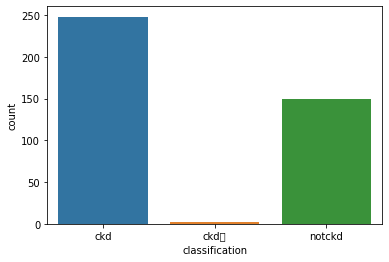

In [6]:
sns.countplot(x='classification', data=df)

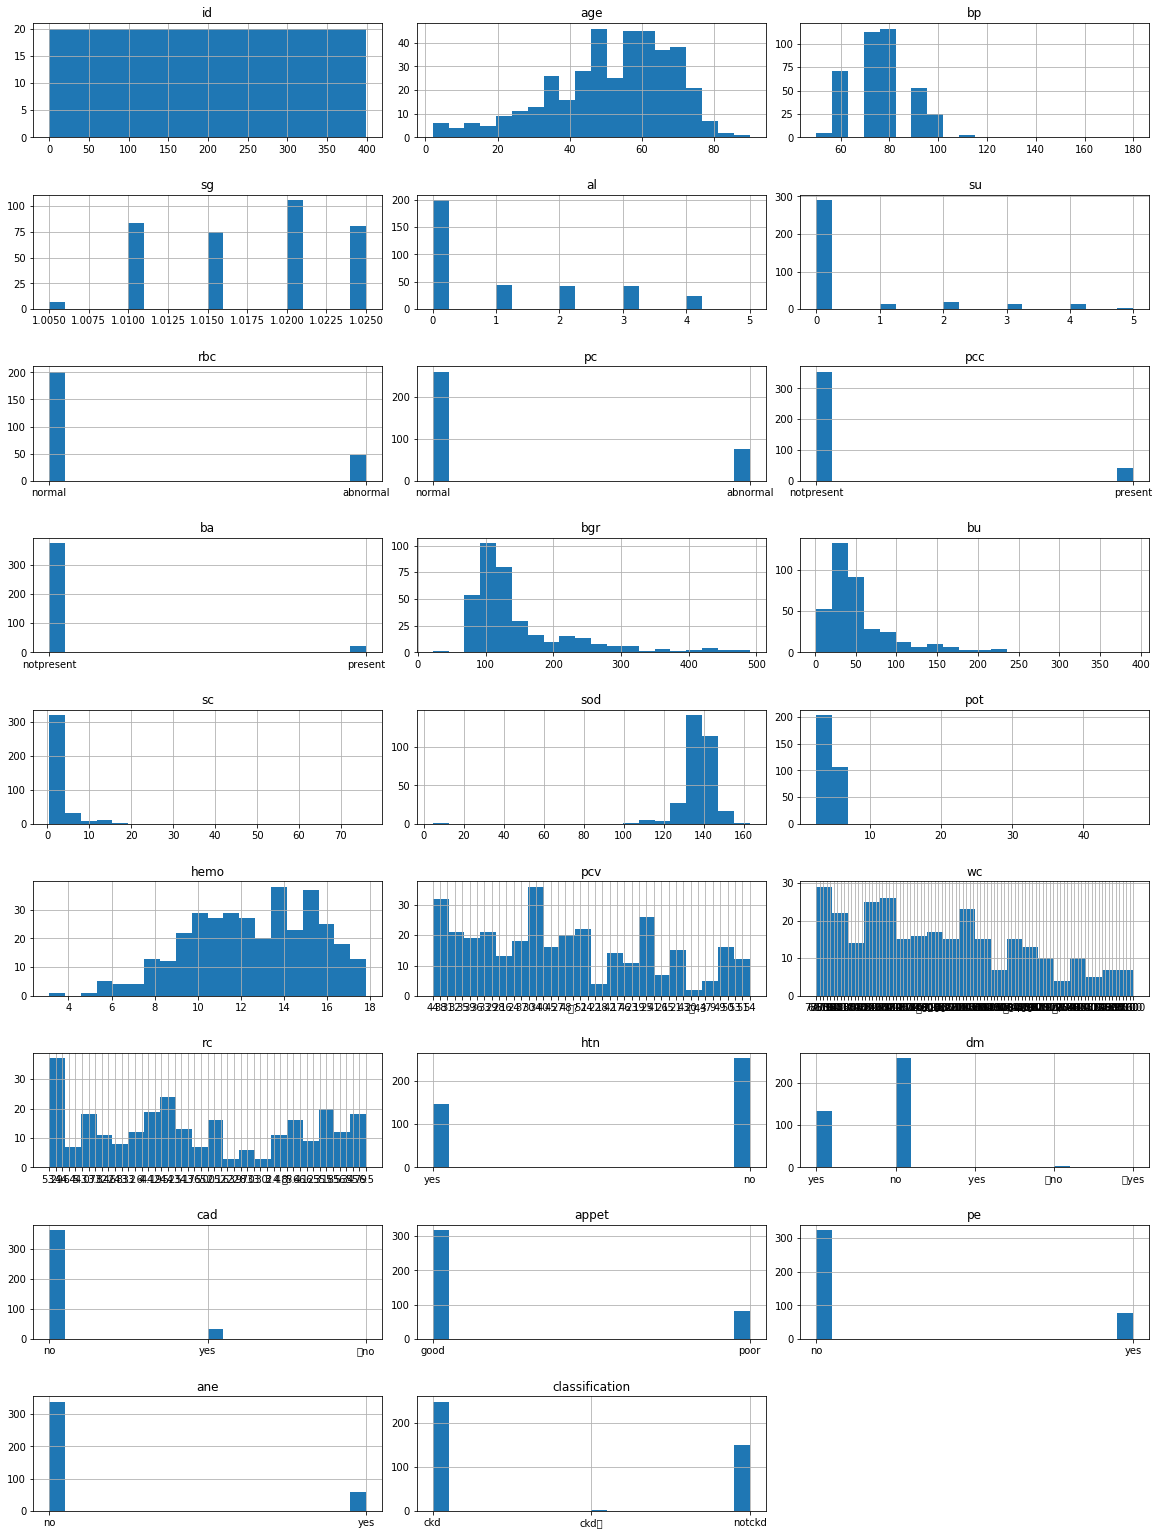

In [7]:
import itertools
col = df.columns[:26]
plt.subplots(figsize = (20, 40))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [8]:
df.rename(columns={'classification':'class'},inplace=True)
df['class']=df['class'].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0,})
df.drop('id',axis=1,inplace=True)

In [9]:
df=df.fillna(method="ffill")

In [10]:
df=df.drop(["rbc","rc","wc","pot","sod"],axis=1)

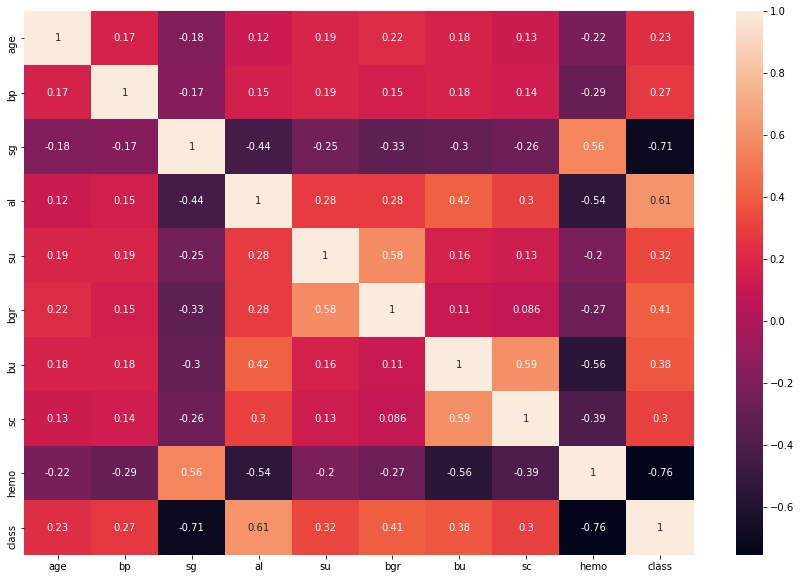

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.show()

In [12]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [13]:
df['appet'] = df['appet'].map({'poor': 0, 'good':1})
df['dm'] = df['dm'].map({'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [14]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44,yes,NaN,no,1,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,0.8,11.3,38,no,NaN,no,1,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,31,no,NaN,no,0,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32,yes,NaN,no,0,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35,no,NaN,no,1,no,no,1


In [15]:
df['pc'] = df['pc'].map({'abnormal': 0, 'normal':1})

In [16]:
df['pcc'] = df['pcc'].map({'present': 0, 'notpresent':1})
df['ba'] = df['ba'].map({'present': 0, 'notpresent':1})
df['htn'] = df['htn'].map({'no': 0, 'yes':1})
df['pe'] = df['pe'].map({'no': 0, 'yes':1})
df['ane'] = df['ane'].map({'no': 0, 'yes':1})
df['cad'] = df['cad'].map({'no': 0, 'yes':1, '\tno':0})

In [17]:
df.drop(["ba"],axis=1,inplace=True)
df.drop(["pe"],axis=1,inplace=True)
df.drop(["cad"],axis=1,inplace=True)
df.drop(["ane"],axis=1,inplace=True)
df.drop(["pc"],axis=1,inplace=True)
df.drop(["sg"],axis=1,inplace=True)

In [18]:
df=df.fillna(method="ffill")

In [19]:
df['dm']=df['dm'].fillna(df['dm'].mode())

In [23]:
df=df.fillna(method="bfill")

In [36]:
df['appet'].unique()

array([1, 0], dtype=int64)

In [25]:
df.head()

,age,bp,al,su,pcc,bgr,bu,sc,hemo,pcv,htn,dm,appet,class
0,48.0,80.0,1.0,0.0,1,121.0,36.0,1.2,15.4,44,1,1.0,1,1
1,7.0,50.0,4.0,0.0,1,121.0,18.0,0.8,11.3,38,0,1.0,1,1
2,62.0,80.0,2.0,3.0,1,423.0,53.0,1.8,9.6,31,0,1.0,0,1
3,48.0,70.0,4.0,0.0,0,117.0,56.0,3.8,11.2,32,1,1.0,0,1
4,51.0,80.0,2.0,0.0,1,106.0,26.0,1.4,11.6,35,0,1.0,1,1


In [26]:
df=df.replace("\t?",31)

In [27]:
X=df.drop(['class'],axis=1)
y=df['class']

In [28]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
dc = DecisionTreeClassifier()
rc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knnc = KNeighborsClassifier()

In [33]:
classifiers = [('Decision Tree Classifier', dc),
              ('Random Forest Classifier', rc),
              ('KNeighbors Classifier', knnc),
             ('Ada Boost Classifier', abc),
             ('Gradient Boosting Classifier', gbc)]

In [34]:
for reg_name, reg in classifiers:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    #y_pred = y_pred.reshape(-1,1)
    print(reg_name, accuracy_score(y_test, y_pred))

Decision Tree Classifier 0.97
Random Forest Classifier 0.98
KNeighbors Classifier 0.94
Ada Boost Classifier 1.0
Gradient Boosting Classifier 0.96


In [35]:
import pickle
kidney_model = "kidney_model.pkl"  
with open(kidney_model, 'wb') as file:  
    pickle.dump(abc, file)